# Exploratory Data Analysis (EDA) – Telecom Customer Churn

This notebook focuses on exploring customer behavior patterns
and identifying key factors associated with customer churn.

The analysis is guided by business questions, not random visualization.

In [1]:
#installing Packages
!pip install seaborn
!pip install matplotlib
!pip install tabulate


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load raw churn dataset
#data_path = "../data/raw/customer_churn.csv"
data = "..\\data\\raw\\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data)


In [4]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

C:\Users\shant\AppData\Local\Temp\ipykernel_33176\3246217253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x = df['Churn'], palette= 'Set2')


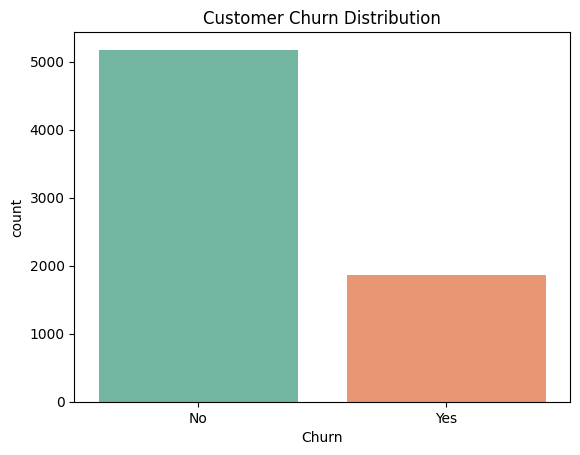

In [5]:
#Visualize the Churn

sns.countplot(data=df, x = df['Churn'], palette= 'Set2')
plt.title("Customer Churn Distribution")
plt.show()

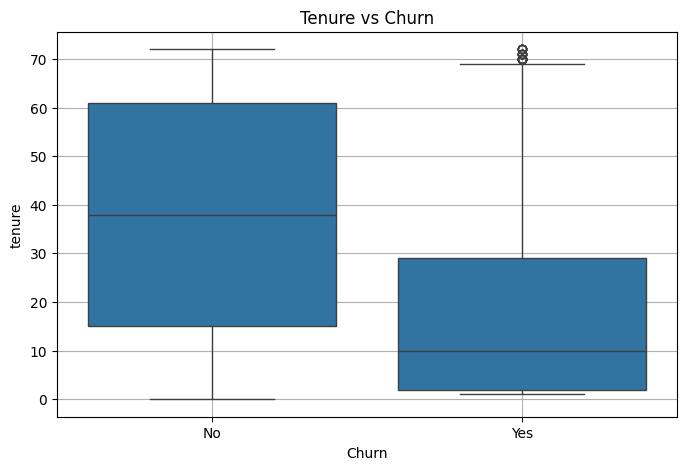

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn',y = 'tenure')
plt.title("Tenure vs Churn")
plt.grid()
plt.show()

#low tenure leads to More Churn
#there is High Risk that People Would Churn During Intial tenure Period 

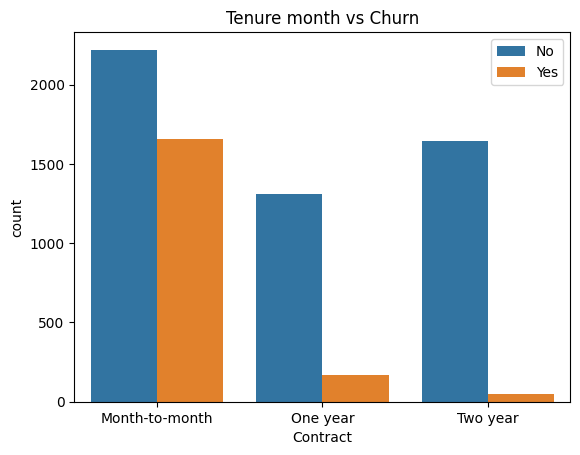

In [7]:
sns.countplot(data=df, x = 'Contract', hue = 'Churn')
plt.title("Tenure month vs Churn")
plt.legend()
plt.show()

#Business insight:
#Month-to-month contracts churn the most
#Long-term contracts reduce churn risk

C:\Users\shant\AppData\Local\Temp\ipykernel_33176\2248360099.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


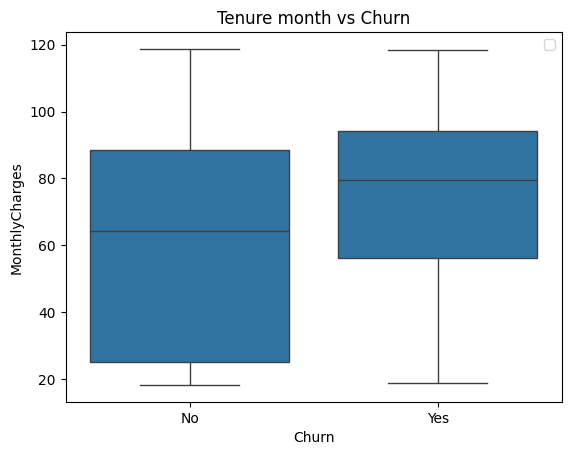

In [8]:
sns.boxplot(data=df, x = 'Churn', y = 'MonthlyCharges')
plt.title("Tenure month vs Churn")
plt.legend()
plt.show()

#Interpretation:
#High monthly charges increase churn risk
#Price sensitivity is a major factor

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

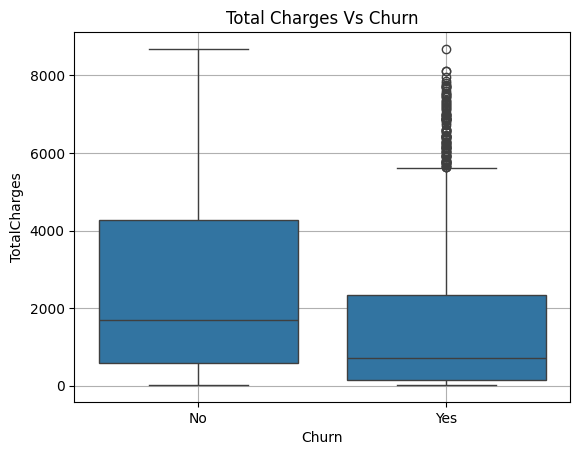

In [10]:
sns.boxplot(data=df, x = 'Churn', y = 'TotalCharges')
plt.title("Total Charges Vs Churn")
plt.grid()
plt.show()

#The One Who had Paid More Charges will not churn
#Low Life time Value Customer will Churn More

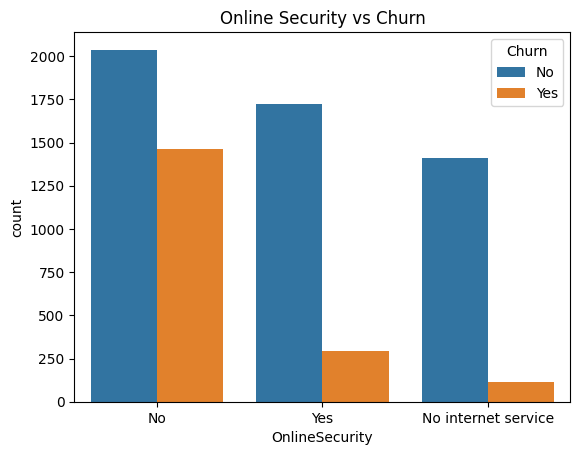

In [11]:
#Service Adoption 
sns.countplot(data=df, x='OnlineSecurity', hue='Churn')
plt.title("Online Security vs Churn")
plt.show()

#The Customer With Value Added Service Churn less 


([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

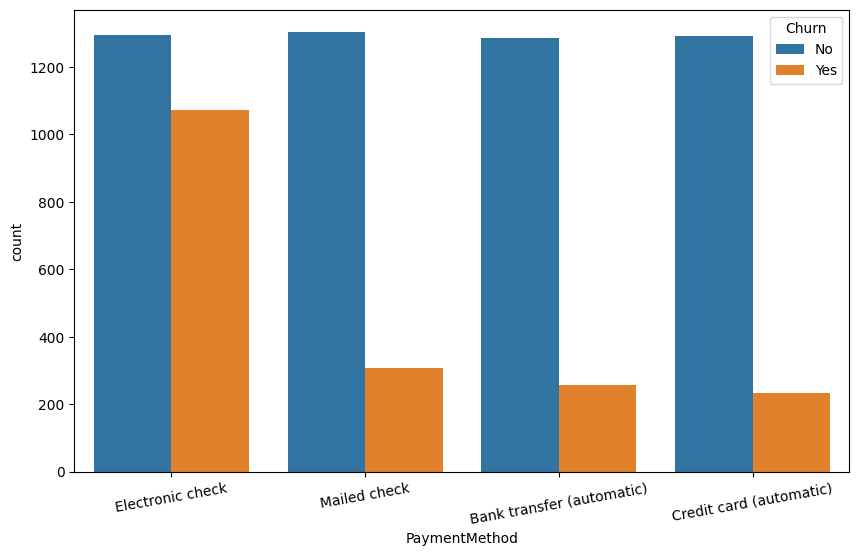

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'PaymentMethod', hue = 'Churn')
plt.xticks(rotation = 10)

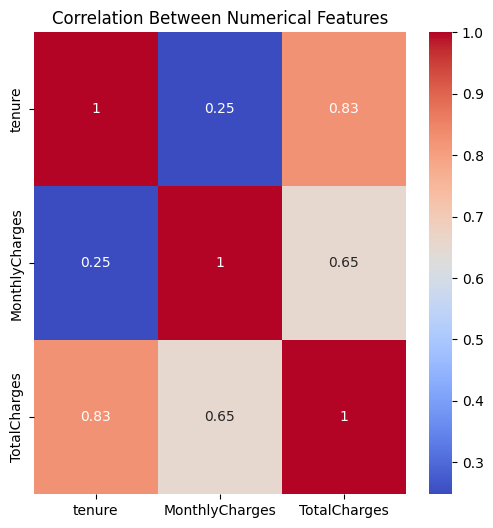

In [ ]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

"""
A strong positive correlation is observed between tenure and TotalCharges.
This indicates that customers with longer tenure naturally accumulate higher total charges over time.
This relationship reflects expected business behavior in a subscription-based telecom model and is not a data quality concern.
"""